### QED-C Application-Oriented Benchmarks - QSim Version

In [1]:
min_qubits=2
max_qubits=15
skip_qubits=1
max_circuits=3
num_shots=1000

backend_id="dm_simulator"
#backend_id="statevector_simulator"

#hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [2]:
import sys

sys.path[1:1] = [ "_common", "_common/qsim" ]

import execute as ex

# noise parameters for dm-simulator (introduce noise by changing the values)
options_noise = {
    'plot': False,
    "thermal_factor": 0.9,
    'show_partition': False,
    "decoherence_factor": 1.0,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 1.0,
    "rotation_error": {'rx': [1.0, 0.0], 'ry': [1.0, 0.0], 'rz': [1.0, 0.0]},  # Default values [1.0, 0.0]
    "tsp_model_error": [1.0, 0.0],
}

ex.options_noise = options_noise


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### If qiskit-provider-aer module not found error is coming, try to uninstall and re-install qiskit-aer module

In [4]:
# pip uninstall qiskit-aer -y

In [5]:
# pip install qiskit-aer

### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - QSim
... execution starting at Aug 14, 2024 11:46:59 UTC
DM_SIMULATOR
************
Executing [2] circuits with num_qubits = 3
************
Executing [2] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 7, 0.083
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 7, 0.071, 1.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.446, 0.232 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.904, 0.872

************
Executing [2] circuits with num_qubits = 5
************
Executing [2] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.088
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 8, 0.071, 1.5
Average Creation, Elapsed, Execution Time for the 4 qubit 

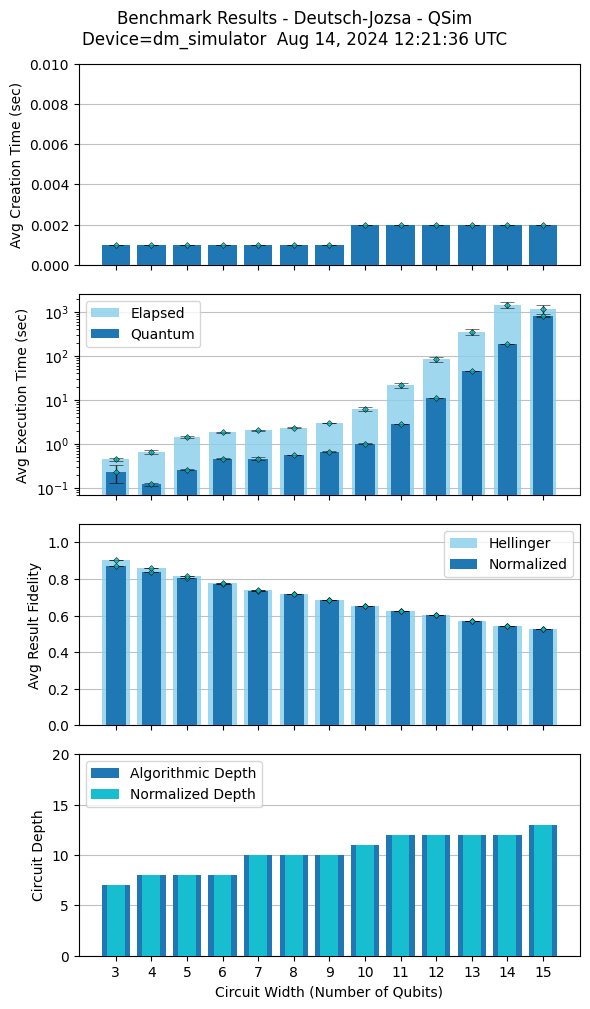

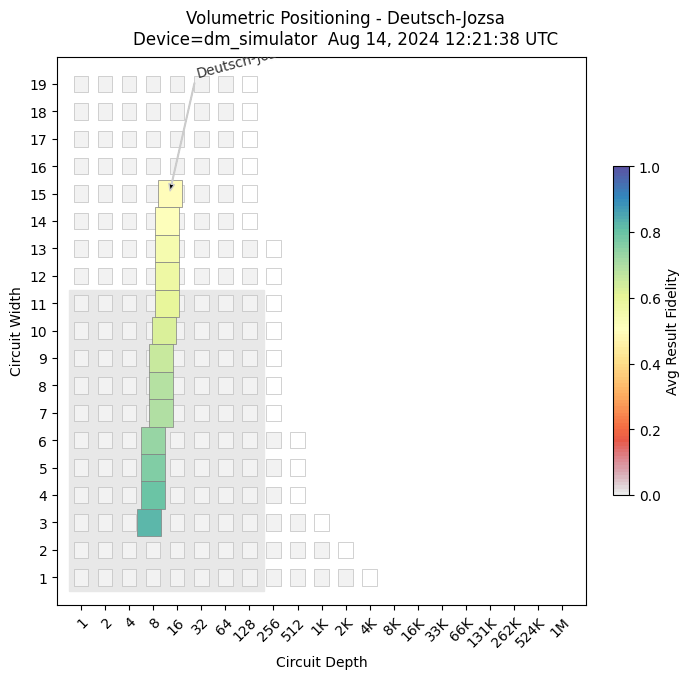

In [6]:
import sys
sys.path.insert(1, "deutsch-jozsa/qsim")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani (1) Benchmark Program - QSim
... execution starting at Aug 14, 2024 12:21:39 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 6, 0.141
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 6, 0.116, 1.333
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.468, 0.092 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 6, 0.061
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 6, 0.044, 0.667
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 1.083, 0.151 secs
Average Tr

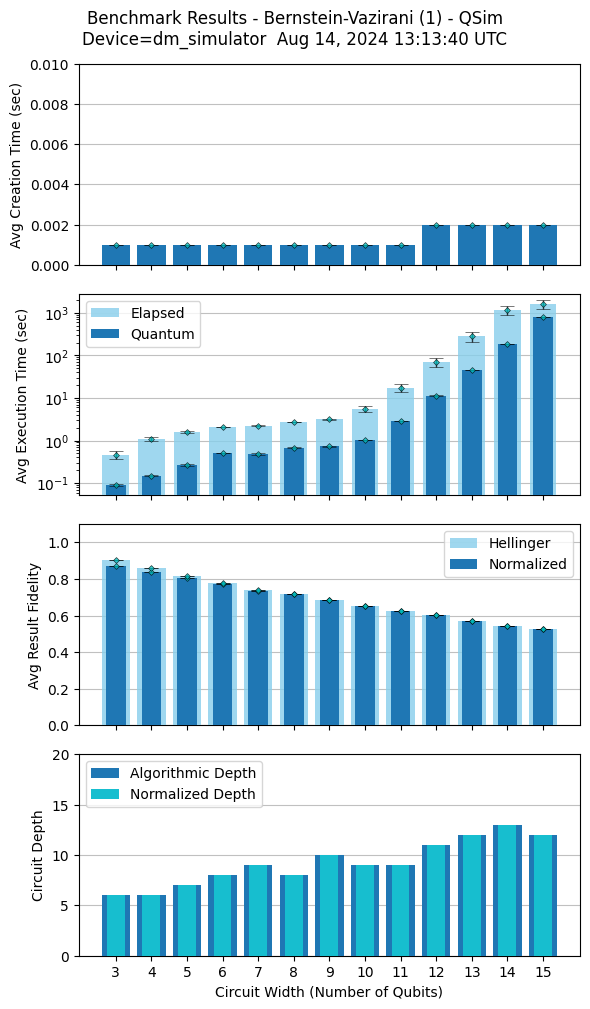

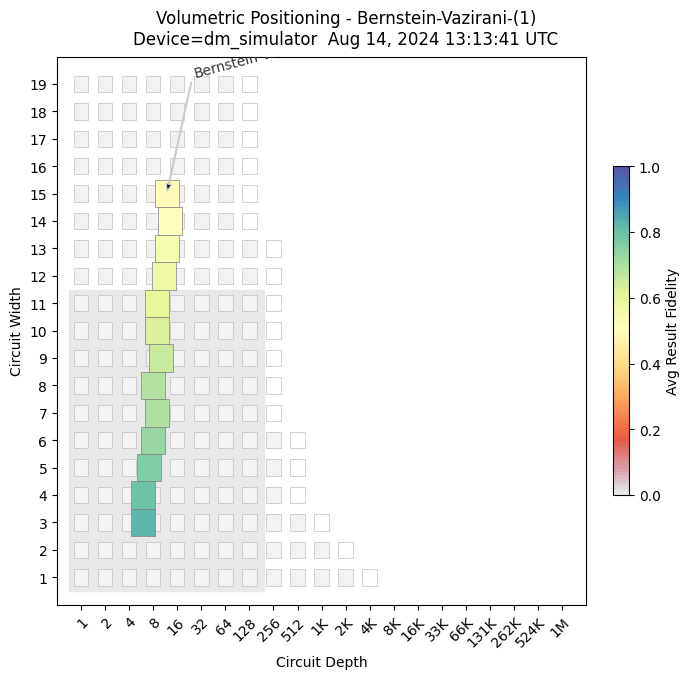

In [7]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Bernstein-Vazirani - Method 2

Bernstein-Vazirani (2) Benchmark Program - QSim
... execution starting at Aug 14, 2024 13:13:42 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 3
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 9, 0.114
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 10, 0.093, 1.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.294, 0.057 secs
Average Transpiling, Validating, Running Times for group 3 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 0.25, 0.0

************
Executing [3] circuits with num_qubits = 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 13, 0.163
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 15, 0.132, 1.667
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.646, 0.055 secs
Average Tran

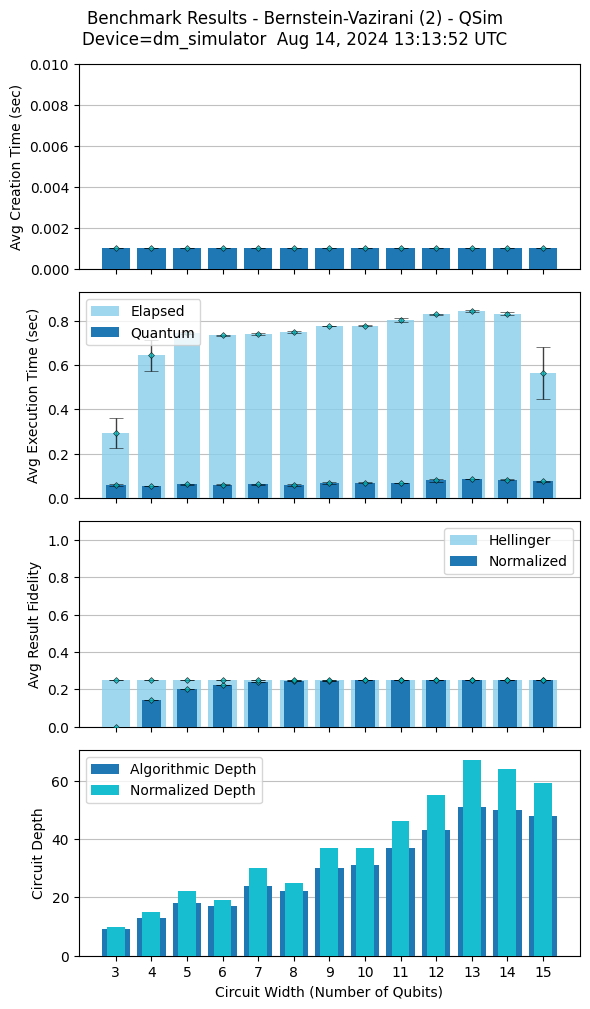

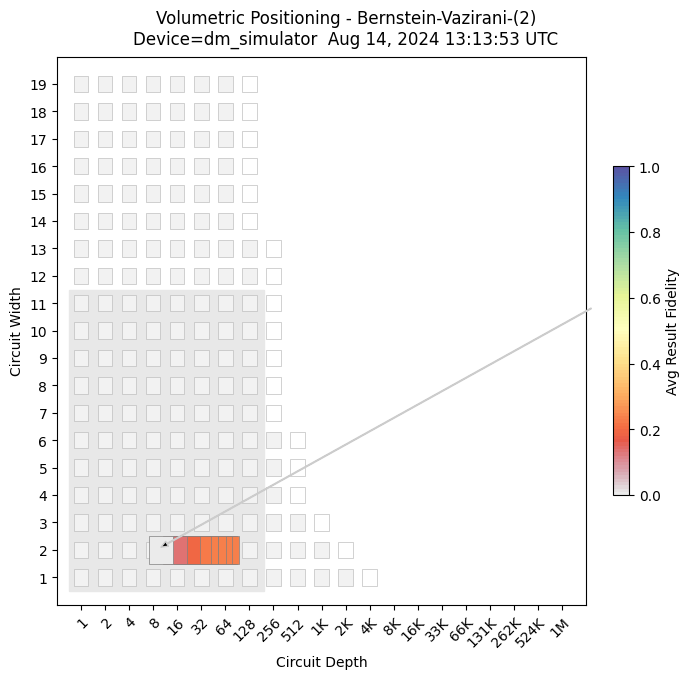

In [8]:
import sys
sys.path.insert(1, "bernstein-vazirani/qsim")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hidden Shift

Hidden Shift Benchmark Program - QSim
... execution starting at Aug 14, 2024 13:13:54 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
************
Executing [3] circuits with num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.189
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 16, 0.091, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.553, 0.059 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.215
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 16, 0.094, 4.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 1.348, 0.17 secs
Average Transpiling, Va

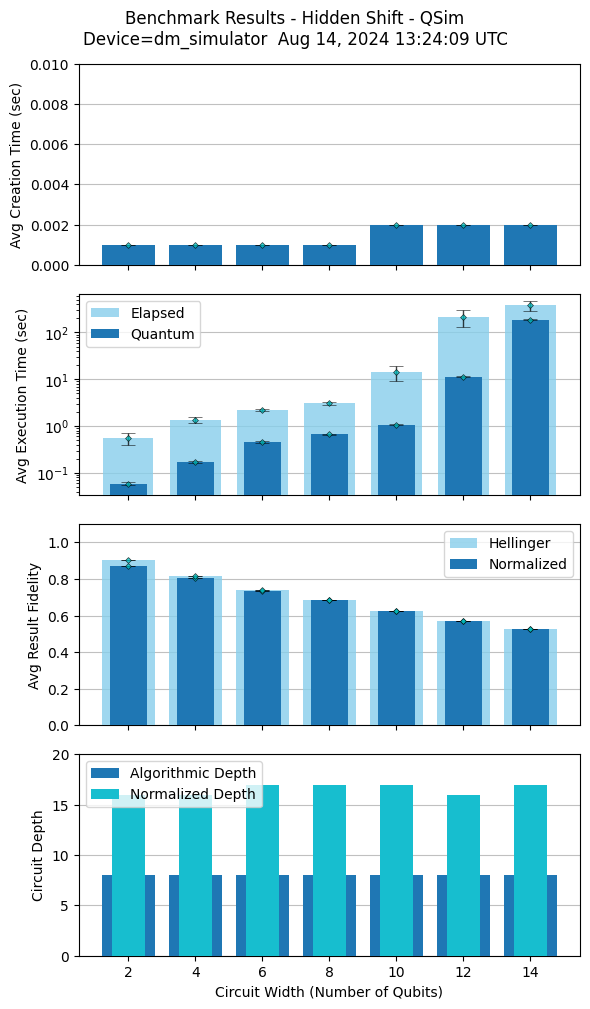

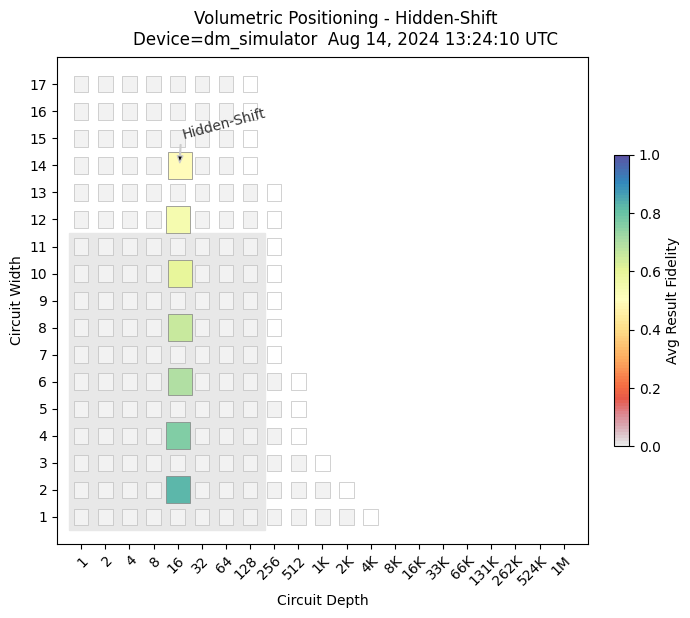

In [9]:
import sys
sys.path.insert(1, "hidden-shift/qsim")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                #hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Quantum Fourier Transform - Method 1

In [ ]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

Quantum Fourier Transform (1) Benchmark Program - QSim
... execution starting at Aug 14, 2024 13:24:11 UTC
DM_SIMULATOR
************
Executing [3] circuits with num_qubits = 2
... number of gates, depth = 11, 8
************
Executing [3] circuits with num_qubits = 3
... number of gates, depth = 19, 14
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.215
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 18, 0.207, 4.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.002, 0.394, 0.056 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.904, 0.872

************
Executing [3] circuits with num_qubits = 4
... number of gates, depth = 29, 22
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 15, 0.368
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 35,

### Quantum Fourier Transform - Method 2

In [ ]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qsim")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
              #  hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Grover

In [ ]:
import sys
sys.path.insert(1, "grovers/qsim")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Phase Estimation

In [ ]:
import sys
sys.path.insert(1, "phase-estimation/qsim")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### HHL Linear Solver

In [ ]:
import sys
sys.path.insert(1, "hhl/qsim")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Amplitude Estimation

In [ ]:
import sys
sys.path.insert(1, "amplitude-estimation/qsim")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project,
                exec_options=exec_options)

### Monte Carlo

In [ ]:
import sys
sys.path.insert(1, "monte-carlo/qsim")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Hamiltonian Simulation

In [ ]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qsim")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### VQE - Method 1

In [ ]:
import sys
sys.path.insert(1, "vqe/qsim")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Shor - Method 1

In [ ]:
import sys
sys.path.insert(1, "shors/qsim")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
               # hub=hub, group=group, project=project, 
                exec_options=exec_options)

### Shor - Method 2

In [ ]:
# import sys
# sys.path.insert(1, "shors/qsim")
# import shors_benchmark
# shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
#                 method=2,
#                 backend_id=backend_id, provider_backend=provider_backend,
#                # hub=hub, group=group, project=project,
#                 exec_options=exec_options)

### Combined Benchmark Results

In [ ]:
import sys
sys.path.insert(1, "_common/qsim")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)